#### Question : 1

In [436]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time 

#### Processing the Training and Testing Data

In [437]:
data = scipy.io.loadmat('train_32x32.mat')
X = data['X'].T 
y = data['y']

X_train = np.empty((0, 3, 32, 32), dtype=X.dtype)
y_train = np.empty((0, 1), dtype=y.dtype)

for i in range(1,11):
    ind = np.where(y == i)[0]
    indices = ind[:2500]
    X_train = np.append(X_train, X[indices], axis=0)
    y_train = np.append(y_train, y[indices])

In [438]:
data = scipy.io.loadmat('test_32x32.mat')
X_test = data['X'].T
y_test = data['y']

In [439]:
# If the input data should be converted to gray-scale 
# X_train = np.mean(X_train, axis = 1)
# X_test = np.mean(X_test, axis = 1)

In [440]:
X_train = X_train.reshape(X_train.shape[0], -1)
# print(X_train.shape[0])
X_test = X_test.reshape(X_test.shape[0], -1)

In [441]:
X_train.shape

(25000, 3072)

In [442]:
scalar = StandardScaler()
X_train_std = scalar.fit_transform(X_train)

(a) Perform PCA on SVHN data set. Find how many top eigenvectors are required to keep
the proportion of variance above 0.9. Plot PoV against number of eigenvectors.

In [443]:
pca = PCA()
pca.fit(X_train_std)

PCA()

In [444]:
var_ratio = pca.explained_variance_ratio_ 
cum_var_ratio = np.zeros_like(var_ratio)
cum_var_ratio[0] = var_ratio[0] 
threshold = 0.9 
eigen_num = 0 
for i in range(1, len(var_ratio)):
    cum_var_ratio[i] = cum_var_ratio[i-1] + var_ratio[i]
    if cum_var_ratio[i] > threshold and eigen_num == 0:
        eigen_num = i+1
# print(cum_var_ratio)
print("No of eigenvectors required for the proportion of variance to be above 0.9 is ", eigen_num)

No of eigenvectors required for the proportion of variance to be above 0.9 is  27


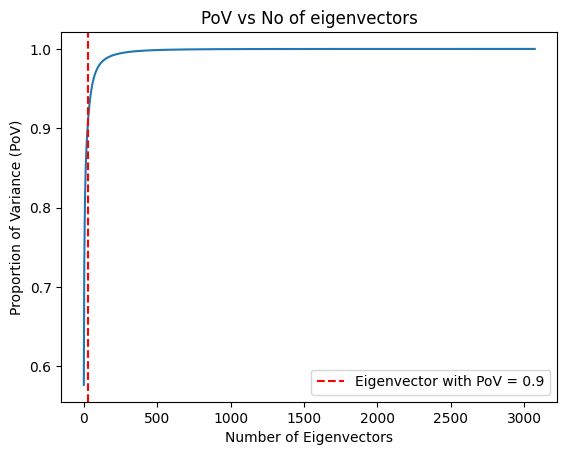

In [445]:
x_axis = range(1, len(cum_var_ratio) + 1)
plt.plot(x_axis, cum_var_ratio)
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Proportion of Variance (PoV)')
plt.axvline(eigen_num, color='red', linestyle='--', label = 'Eigenvector with PoV = 0.9')
plt.legend()
plt.title('PoV vs No of eigenvectors')
plt.show()

(b) Visualize top 10 eigenvectors and provide reconstruction of 10 SVHN samples (one
from each class) using top 10 eigenvectors.

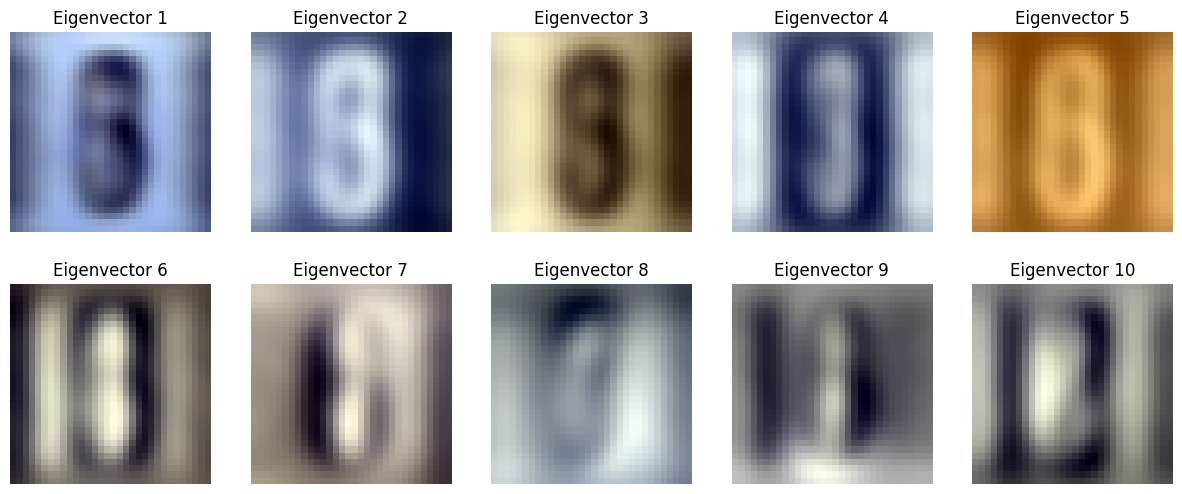

In [446]:
eigenvectors = pca.components_[:10]
# print(eigenvectors)


fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = eigenvectors[i].reshape(3, 32, 32).T


    img_min = np.min(img)
    img_max = np.max(img)
    nor_img = (img - img_min) / (img_max - img_min)

    ax.imshow(nor_img)
    ax.axis('off')
    ax.set_title(f'Eigenvector {i + 1}')


plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

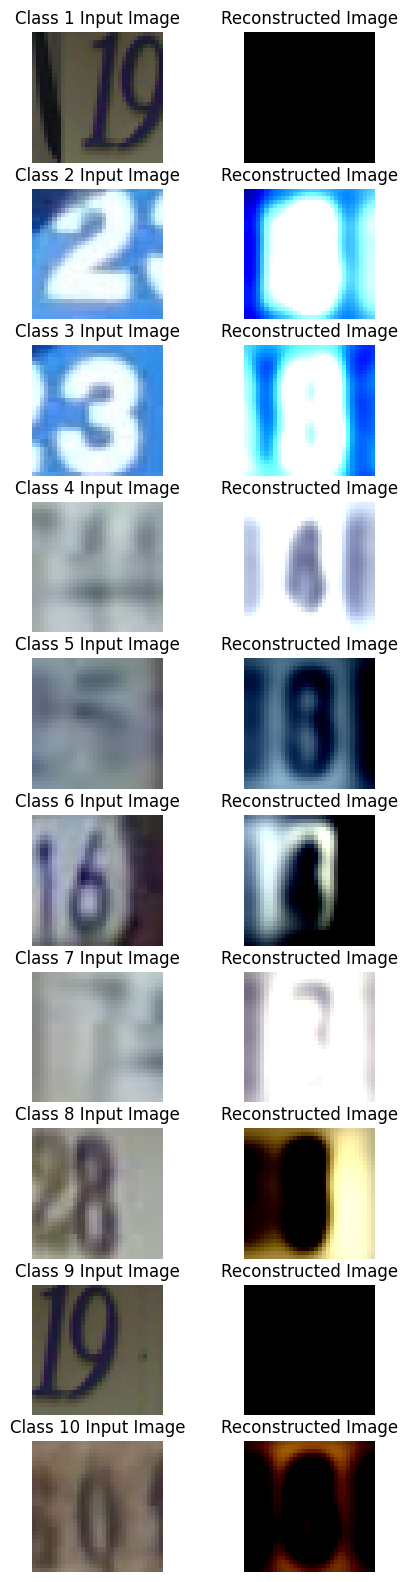

In [447]:
fig, axes = plt.subplots(10, 2, figsize=(5, 20))

top_comp = pca.components_[:10].T
pca2 = PCA(n_components=10)
pca2.fit_transform(X_train_std)

rec_images = []

for i in range(10):
    idx = np.where(y_train == i+1)[0][0]

    # Input image
    img1 = X_train[idx].reshape(3, 32, 32).T
    axes[i, 0].imshow(img1)  
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Class {i+1} Input Image')
    
    # Reconstructed image 
    # used for all components
    # img2 = np.dot(pca.transform(X_train_std[idx].reshape(1,-1)), pca.components_).reshape(3,32,32).T
    # print(img2.shape)
    # img2 = img2.reshape(X_train[idx].shape, order='F')

    transform = pca2.transform(X_train_std[idx].reshape(1, -1))
    top_comps = transform[:, :10]
    rec_data = pca2.inverse_transform(transform)
    img2 = rec_data.reshape(3,32,32).T
    rec_images.append(img2)


    axes[i, 1].imshow(img2) 
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Reconstructed Image')



plt.show()

(c) Run k-NN (for k=5 and k=7) on raw data and data obtained after PCA dimensionality
reduction for dimension as found in part (a) and for dimension 10 as in part (b). Provide
the accuracy of the predictions on the test data set for these various cases and discuss
your observations.

In [448]:
# Raw Data 

# For k = 5 : 
knn = KNeighborsClassifier( n_neighbors = 5 )
knn.fit(X_train, y_train.ravel())
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy*100,"%")

# For k = 7 : 
knn = KNeighborsClassifier( n_neighbors = 7 )
knn.fit(X_train, y_train.ravel())
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy*100,"%")

Accuracy: 40.277350952673636 %
Accuracy: 41.160878918254454 %


In [449]:
# Data obtained after PCA dimensionality reduction for dimension as found in part (a)

pca = PCA( n_components = eigen_num)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# For k = 5 :
knn = KNeighborsClassifier( n_neighbors = 5 )
knn.fit(X_train_pca, y_train.ravel())
accuracy = knn.score(X_test_pca, y_test)
print("Accuracy:", 100 * accuracy, "%")

# For k = 7 :
knn = KNeighborsClassifier( n_neighbors = 7 )
knn.fit(X_train_pca, y_train.ravel())
accuracy = knn.score(X_test_pca, y_test)
print("Accuracy:", accuracy*100,"%")

Accuracy: 39.954671173939765 %
Accuracy: 41.045636140135215 %


In [450]:
# Data obtained after PCA dimensionality reduction for dimension 10 as in part (b)

pca = PCA( n_components = 10 )
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# For k = 5 :
knn = KNeighborsClassifier( n_neighbors = 5 )
knn.fit(X_train_pca, y_train.ravel())
accuracy = knn.score(X_test_pca, y_test)
print("Accuracy:", accuracy*100,"%")

# For k = 7 :
knn = KNeighborsClassifier( n_neighbors = 7 )
knn.fit(X_train_pca, y_train.ravel())
accuracy = knn.score(X_test_pca, y_test)
print("Accuracy:", accuracy*100,"%")

Accuracy: 25.199754148740013 %
Accuracy: 26.087123540258144 %


Observations : 
1) The accuracy with the KNN with k = 5 is less than the KNN with k = 7. This is because as k increases, it provides a smoother decision boundary, making the algorithm less sensitive to noise and outliers, resulting in improved accuracy.
2) The accuracy decreases as the number of features in the input data decreases for k = 5 and k = 7 because of the loss of information from the dropped features.